# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [4]:
from src.make_db import create_movies_db

In [5]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [6]:
import os
import sqlite3
import pandas as pd
# Open up a connection
conn = sqlite3.connect('data/movies.db')
# Initialize a cursor
cursor = conn.cursor()

In [7]:
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') #load data
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
budgets['domestic_gross'] = budgets['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float) #change to float to order by
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
budgets['production_budget'] = budgets['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [9]:
budgets['end_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross'] - budgets['production_budget'] 
budgets.head() # calculated end gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09


In [10]:
budgets = budgets.sort_values(by='end_gross', ascending=False)
budgets #sort end gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.000000e+00,-9.000000e+07
479,80,"Dec 13, 2017",Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [11]:
stream_platform = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv')
stream_platform #load CECE's data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [12]:
stream_platform = stream_platform.dropna(subset = ['Rotten Tomatoes'])
stream_platform #drop na from rotten tomato

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [13]:
stream_title = stream_platform['Title'] #title list from CECE's data with clearing all na value from rotten tomato

In [14]:
data_title = budgets['movie']# list of movie'name from the Data given

In [15]:
streammoviedata = stream_platform[stream_platform['Title'].isin(data_title)] 
#find all of the matching names on the CECE's data

In [16]:
streammovie_titles = streammoviedata['Title']
streammovie_titles #title of all the names that matched

0                                   Inception
1                                  The Matrix
2                      Avengers: Infinity War
3                          Back to the Future
6                                 The Pianist
                         ...                 
16552    Confessions of a Teenage Drama Queen
16633                       The Country Bears
16643                        Doug's 1st Movie
16705                        Meet the Deedles
16719                              Pocahontas
Name: Title, Length: 988, dtype: object

In [14]:
stream_platform[~stream_platform['Title'].isin(data_title)] #find all of the NOT matching names on the CECE's data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
11,11,12,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
12,12,13,Pan's Labyrinth,2006,18+,8.2,95%,1,0,0,0,0,Guillermo del Toro,"Drama,Fantasy,War","Mexico,Spain",Spanish,118.0
18,18,19,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,16637,16638,Inspector Gadget 2,2003,all,3.4,40%,0,0,0,1,0,Alex Zamm,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0


In [15]:
budgets[budgets['movie'].isin(streammovie_titles)] #find all of the matching names on the the data given

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09
...,...,...,...,...,...,...,...
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07
1206,7,"Nov 8, 2019",Arctic Dogs,50000000.0,0.0,0.000000e+00,-5.000000e+07
193,94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-8.905748e+07


In [16]:
budgets[~budgets['movie'].isin(streammovie_titles)] #find all of the NOT matching names on the the data given

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.681730e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.000000e+00,-9.000000e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [17]:
df = budgets.loc[(budgets['domestic_gross'] > 0.0) & (budgets['worldwide_gross'] > 0.0)]
df #get rid of all the 0's

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-8.792278e+07
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
193,94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-8.905748e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [18]:
df_title = df['movie']

In [19]:
nonstream_eg=df[~df['movie'].isin(streammovie_titles)] #end gross of all the movies not on stream
nonstream_eg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.681730e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
607,8,"Sep 2, 2005",A Sound of Thunder,80000000.0,1900451.0,6.300451e+06,-7.179910e+07
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-8.792278e+07
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [20]:
nonstream_eg.describe() #not on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [21]:
onstream_eg=df[df['movie'].isin(streammovie_titles)] #end gross of all the movies on stream
onstream_eg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09
...,...,...,...,...,...,...,...
748,49,"May 28, 2010",Agora,70000000.0,619423.0,3.899229e+07,-3.038828e+07
1781,82,"Jul 31, 2015",The Young and Prodigious T.S. Spivet,33000000.0,176847.0,3.576870e+05,-3.246547e+07
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07


In [22]:
onstream_eg.describe() #on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [23]:
df_nonstream = stream_platform[~stream_platform['Title'].isin(df_title)] #CECE's data on movies NOT on stream
df_nonstream 

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
11,11,12,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
12,12,13,Pan's Labyrinth,2006,18+,8.2,95%,1,0,0,0,0,Guillermo del Toro,"Drama,Fantasy,War","Mexico,Spain",Spanish,118.0
18,18,19,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,16637,16638,Inspector Gadget 2,2003,all,3.4,40%,0,0,0,1,0,Alex Zamm,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0


In [24]:
df_stream = stream_platform[stream_platform['Title'].isin(df_title)] #CECE's data on movies on stream
df_stream

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,1,0,Sara Sugarman,"Comedy,Family,Music,Romance","Germany,United States",English,89.0
16633,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,1,0,Peter Hastings,"Comedy,Family,Music,Musical",United States,English,88.0
16643,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,1,0,Maurice Joyce,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [25]:
dfbudgetfilter = df[df['movie'].isin(df_stream['Title'])] #filter two lists together and show the given data
dfbudgetfilter

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09
...,...,...,...,...,...,...,...
748,49,"May 28, 2010",Agora,70000000.0,619423.0,3.899229e+07,-3.038828e+07
1781,82,"Jul 31, 2015",The Young and Prodigious T.S. Spivet,33000000.0,176847.0,3.576870e+05,-3.246547e+07
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07


In [26]:
dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year #make Year column to join
dfbudgetfilter

<ipython-input-26-2b475bdbbae0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year #make Year column to join


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross,Year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,2009
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,2018
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09,2012
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09,2018
...,...,...,...,...,...,...,...,...
748,49,"May 28, 2010",Agora,70000000.0,619423.0,3.899229e+07,-3.038828e+07,2010
1781,82,"Jul 31, 2015",The Young and Prodigious T.S. Spivet,33000000.0,176847.0,3.576870e+05,-3.246547e+07,2015
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07,2000
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07,2004


In [27]:
df_stream = df_stream.rename(columns={"Title": "movie"}) #change 'title' to 'movie' to join
df_stream

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,1,0,Sara Sugarman,"Comedy,Family,Music,Romance","Germany,United States",English,89.0
16633,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,1,0,Peter Hastings,"Comedy,Family,Music,Musical",United States,English,88.0
16643,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,1,0,Maurice Joyce,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [28]:
last_data = df_stream.merge(dfbudgetfilter, on=['movie', 'Year']) 
#joing/merging two data together with the same title and name
last_data

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genres,Country,Language,Runtime,id,release_date,production_budget,domestic_gross,worldwide_gross,end_gross
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,...,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,38,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,9.681008e+08
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,...,"Action,Sci-Fi",United States,English,136.0,76,"Mar 31, 1999",65000000.0,171479930.0,4.635174e+08,5.699973e+08
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,...,"Action,Adventure,Sci-Fi",United States,English,149.0,7,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,...,"Adventure,Comedy,Sci-Fi",United States,English,116.0,24,"Jul 3, 1985",19000000.0,212259762.0,3.855248e+08,5.787845e+08
4,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,...,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,86,"Dec 27, 2002",35000000.0,32519322.0,1.118542e+08,1.093735e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,...,"Comedy,Family,Music,Romance","Germany,United States",English,89.0,52,"Feb 20, 2004",15000000.0,29331068.0,3.311885e+07,4.744992e+07
751,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,...,"Comedy,Family,Music,Musical",United States,English,88.0,10,"Jul 26, 2002",20000000.0,16988996.0,1.698900e+07,1.397799e+07
752,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,...,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0,89,"Mar 26, 1999",5000000.0,19421271.0,1.942127e+07,3.384254e+07
753,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,...,"Comedy,Family",United States,English,93.0,63,"Mar 27, 1998",24000000.0,4356126.0,4.356126e+06,-1.528775e+07


In [29]:
last_data['Netflix'].value_counts() #1 = yes it is on

0    452
1    303
Name: Netflix, dtype: int64

In [30]:
last_data['Hulu'].value_counts()

0    633
1    122
Name: Hulu, dtype: int64

In [31]:
last_data['Prime Video'].value_counts()

0    456
1    299
Name: Prime Video, dtype: int64

In [32]:
last_data['Disney+'].value_counts()

0    621
1    134
Name: Disney+, dtype: int64

In [33]:
import matplotlib.pyplot as plt

In [34]:
numofmovie = [303, 122, 299, 134]
nameofplatform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

Text(0, 0.5, 'Number of Movies')

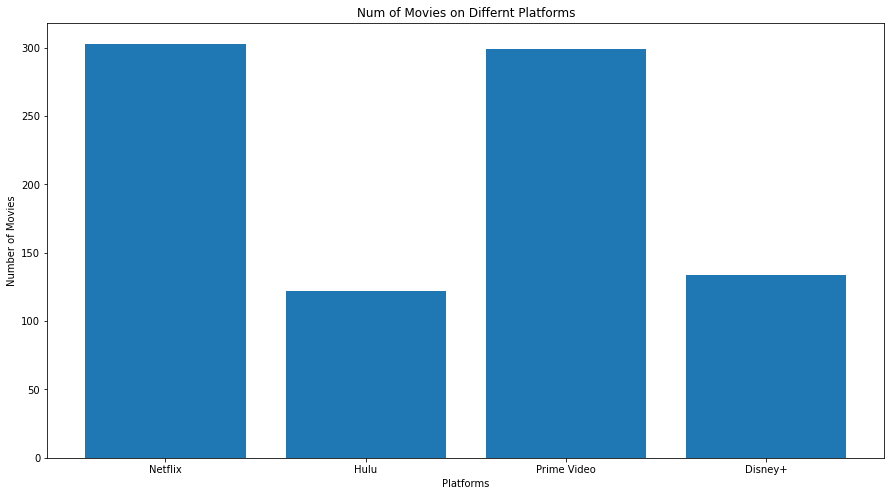

In [35]:
x = nameofplatform
y = numofmovie
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 8))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Num of Movies on Differnt Platforms')
plot_one_ax.set_xlabel('Platforms')
plot_one_ax.set_ylabel('Number of Movies')

In [36]:
nonstream_eg.describe() #not on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [37]:
onstream_eg.describe() #on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [38]:
eg_value = [148.1062, 105.2673]
eg_x = ['On Stream', 'Not On Stream']

Text(0, 0.5, 'End Gross (In Millions)')

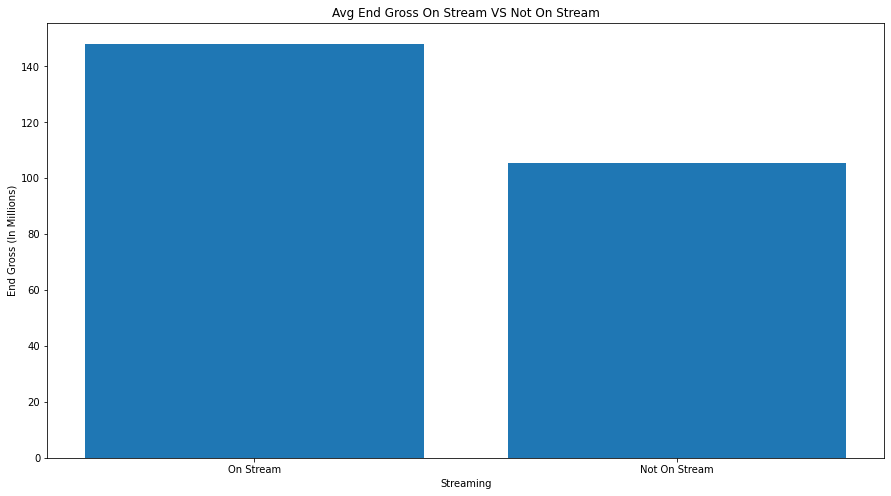

In [39]:
x = eg_x
y = eg_value
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 8))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Avg End Gross On Stream VS Not On Stream')
plot_one_ax.set_xlabel('Streaming')
plot_one_ax.set_ylabel('End Gross (In Millions)')

In [40]:
#dfbudgetfilter[dfbudgetfilter.movie == 'The Signal'] #Joel's code to check if there is 